In [11]:

!pwd
%cd "./een_project3"


/content
/content/een_project3


Image shape: (360, 643)


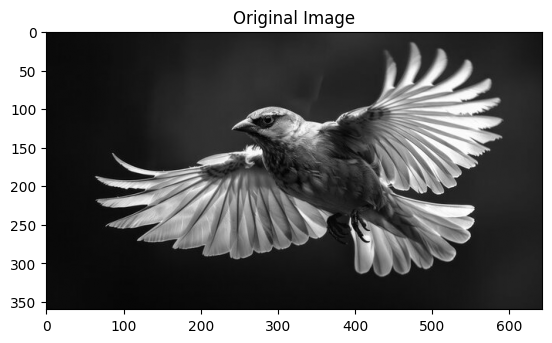

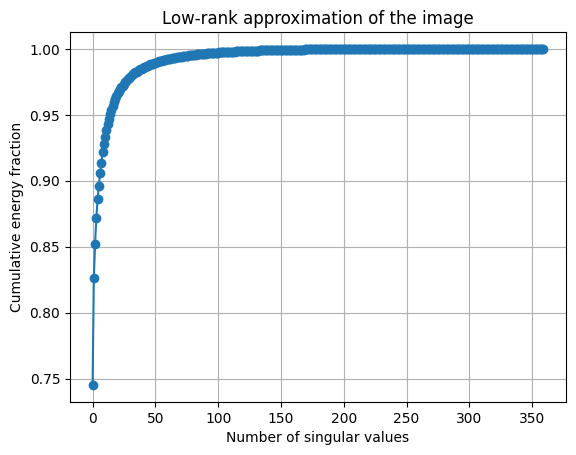

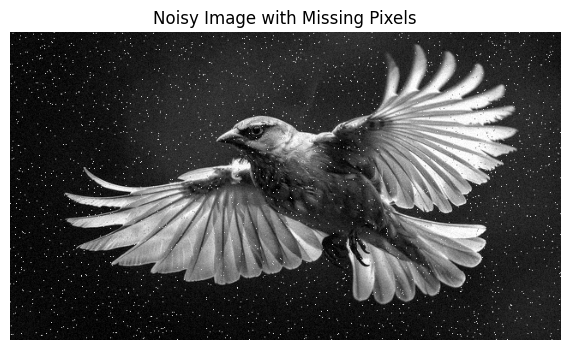

λ=0.0000, RMSE=0.3473
λ=1.1111, RMSE=0.0561
λ=2.2222, RMSE=0.0660
λ=3.3333, RMSE=0.0763
λ=4.4444, RMSE=0.0859
λ=5.5556, RMSE=0.0946
λ=6.6667, RMSE=0.1023
λ=7.7778, RMSE=0.1096
λ=8.8889, RMSE=0.1160
λ=10.0000, RMSE=0.1219

 Best λ = 1.1111111111111112 (RMSE=0.0561)


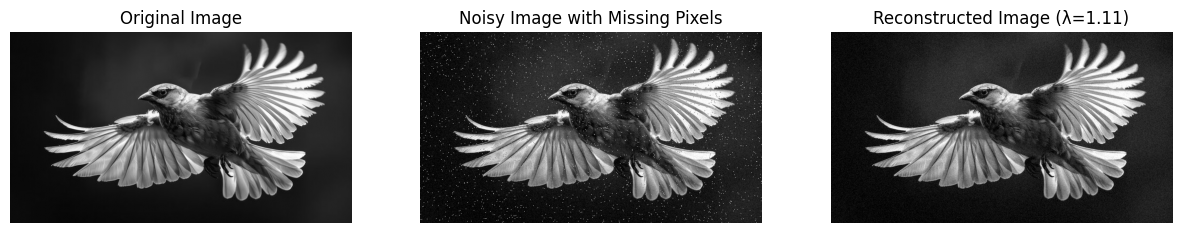

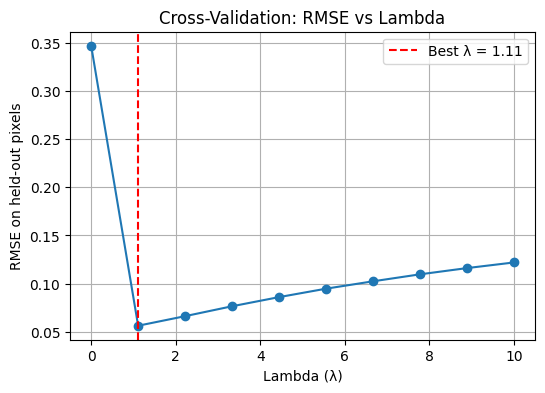

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from utils import *
from imageio.v2 import imread



img = imread("./image.jpg", pilmode='L')  # 'L' ensures grayscale
img = img.astype(float)

# Normalize to 0–1
img = img / 255.0

print("Image shape:", img.shape)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.show()








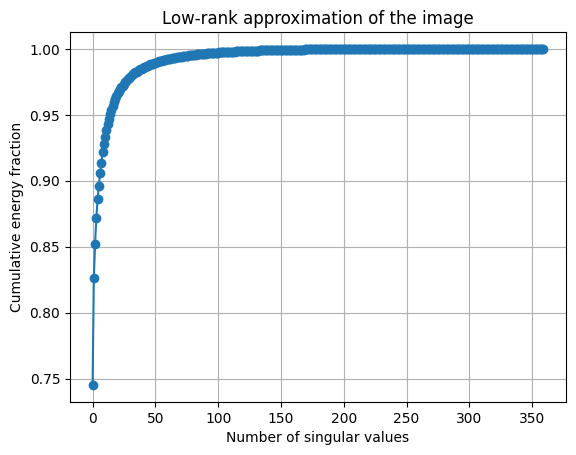

In [13]:
U, s, Vt = np.linalg.svd(img, full_matrices=False)
s_energy = s**2 / np.sum(s**2)
cumulative_energy = np.cumsum(s_energy)

import matplotlib.pyplot as plt
plt.plot(cumulative_energy, marker='o')
plt.xlabel("Number of singular values")
plt.ylabel("Cumulative energy fraction")
plt.title("Low-rank approximation of the image")
plt.grid(True)
plt.show()


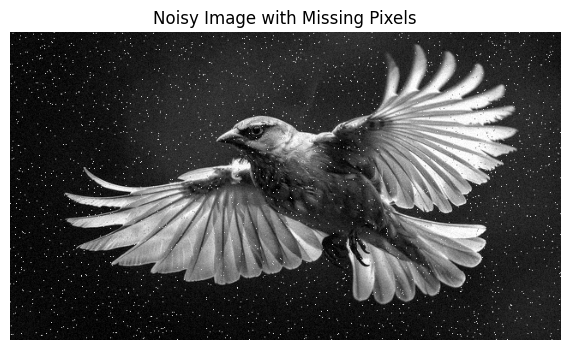

In [14]:
# Apply noise and introduce missing values
img_noisy, mask = add_noise_and_missing(img, missing_fraction=0.01, snr_db=20, random_state=42)

# Show result
plt.figure(figsize=(8,4))
plt.imshow(img_noisy, cmap='gray')
plt.title("Noisy Image with Missing Pixels")
plt.axis('off')
plt.show()

λ=0.0000, RMSE=0.3473
λ=1.1111, RMSE=0.0561
λ=2.2222, RMSE=0.0660
λ=3.3333, RMSE=0.0763
λ=4.4444, RMSE=0.0859
λ=5.5556, RMSE=0.0946
λ=6.6667, RMSE=0.1023
λ=7.7778, RMSE=0.1096
λ=8.8889, RMSE=0.1160
λ=10.0000, RMSE=0.1219

 Best λ = 1.1111111111111112 (RMSE=0.0561)


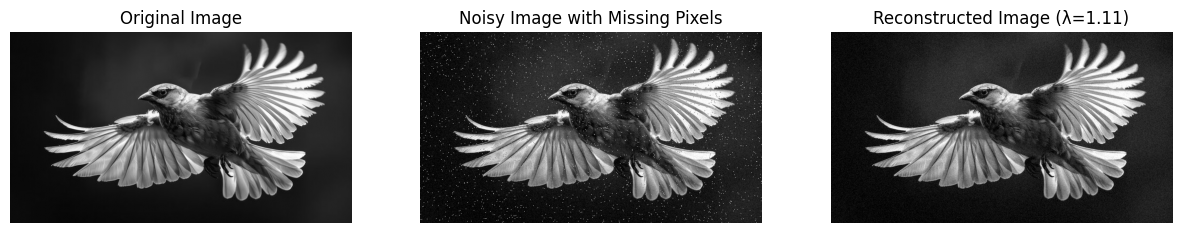

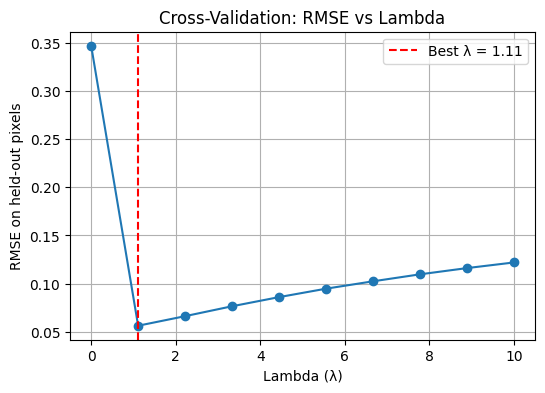

In [15]:
lambda_values = np.linspace(0,10, 10)

best_lambda, results = cross_validate_lambda(img_noisy, lambda_values)
lambdas = list(results.keys())
rmse_values = list(results.values())




# Now I use the best lambda to reconstruct the image
img_reconstructed = softImpute(img_noisy, reg=best_lambda, num_iterations=100, tolerance=1e-5)





plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_noisy, cmap='gray')
plt.title("Noisy Image with Missing Pixels")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_reconstructed, cmap='gray')
plt.title(f"Reconstructed Image (λ={best_lambda:.2f})")
plt.axis('off')

plt.show()

plt.figure(figsize=(6,4))
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.axvline(best_lambda, color='r', linestyle='--', label=f"Best λ = {best_lambda:.2f}")
plt.xlabel("Lambda (λ)")
plt.ylabel("RMSE on held-out pixels")
plt.title("Cross-Validation: RMSE vs Lambda")
plt.grid(True)
plt.legend()
plt.show()